### Integrantes

*   Marcos Gutierrez
*   Fernando Hengstenberg
*   Raúl Monzon
*   David Valenzuela

# HOJA DE TRABAJO No. 7

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Datos de Entrenamientos

IMPORTAMOS LOS DATOS PARA VISUZALICIÓN DE LOS DATOS



In [31]:
data_train = pd.read_csv('train.csv')
print("Shape de datos completos: ", data_train.shape)

Shape de datos completos:  (1460, 81)


In [32]:
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


HACEMOS LA DIVISION DE LOS DATOS, TOMAMOS UNICAMENTE LOS DATOS NUMERICOS QUE SE ENCUENTREN EN LOS DATOS

In [34]:
data_train = data_train.select_dtypes(exclude=['object'])
print("Shape de datos completos: ", data_train.shape)

Shape de datos completos:  (1460, 38)


EVITAMOS LAS CASILLAS QUE SE ENCUENTREN VACIAS



In [0]:
#drop ID de las columnas
data_train.drop('Id',axis = 1, inplace = True)
data_train.fillna(0,inplace=True)

In [36]:
#Datos que contiene las redes neuronales
data_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
data_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


VAMOS A NORMALIZAR LOS DATOS DE ENTRENAMIENTOS



In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#Controlamos las entradas y salidas de los datos de entrenamiento
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(data_train)

In [0]:
multiplied_by = scaler.scale_[13]
added = scaler.min_[13]

JUNTAMOS LOS DATOS A UN DATA PARA VISUALIZACION DE LOS DATOS

In [0]:
scaled_train_df = pd.DataFrame(scaled_train, columns=data_train.columns.values)

In [43]:
#Datos ya normalizados
scaled_train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.996517,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.983085,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.995522,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.994030,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.995025,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [0]:
#columnas de entrenamiento
col_train = ['GrLivArea', 'TotalBsmtSF']
#columnas de entrenamiento sin la variable respuesta
col_train_clear = list(data_train.columns)
col_train_clear.remove('SalePrice')

In [0]:
COLUMNS = col_train
FEATURES = ['GrLivArea', 'TotalBsmtSF']
LABEL = 'SalePrice'

PREPARAMOS LOS DATOS, TOMANDO EN CUENTA LOS DATOS QUE ESTAN NORMALIZADOS

In [0]:
train_set = scaled_train_df[COLUMNS]
prediction_set = scaled_train_df.SalePrice

In [0]:
from sklearn.model_selection import train_test_split

OBTENEMOS LOS DATOS, TOMANDO DE REFERENCIA LOS DATOS DE ENTRENAMIENTO

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns=[LABEL])
train_set = pd.DataFrame(X_train, columns=FEATURES).merge(y_train, left_index = True, right_index = True)
train_set.head()

,GrLivArea,TotalBsmtSF,SalePrice
615,0.135644,0.153191,0.142480
613,0.148078,0.183306,0.155673
1303,0.241522,0.264484,0.273712
486,0.139224,0.175614,0.168171
561,0.198757,0.227332,0.187613


In [0]:
training_sub = train_set[col_train]

In [99]:
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(X_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,GrLivArea,TotalBsmtSF,SalePrice
413,0.130746,0.164975,0.333287
218,0.305200,0.130606,0.132065
168,0.261115,0.137480,0.724456
67,0.215712,0.237807,0.375087
453,0.236624,0.125696,0.175809


Vamos a comenzar con una SVM para regresion

In [0]:
from sklearn import svm

Vamos a comenzar creando el modelo



In [0]:
svmres = svm.SVR()

Vamos a entrenar el modelo con los datos de training

In [61]:
svmres.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Relicemos la prediccion sobre el set de prueba

In [0]:
y_predict = svmres.predict(X_test)

Realiacimos un avizualisacion de la prediccion

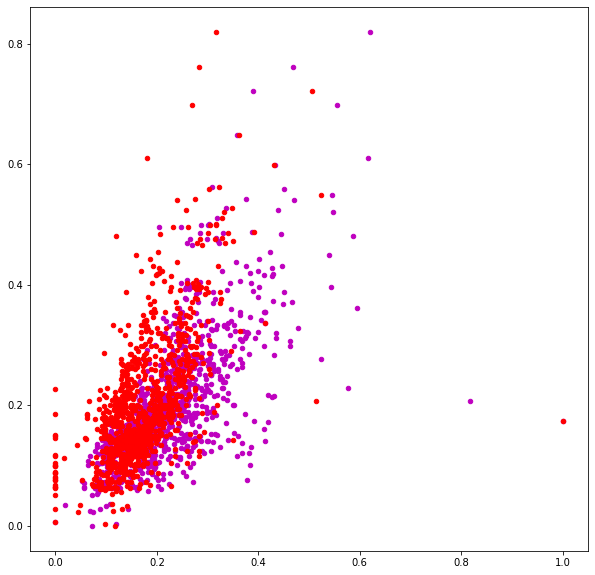

In [80]:
plt.subplots(figsize=(10, 10)) 
plt.scatter(X_train['GrLivArea'], y_train, color = "m", marker = "o", s = 20)
plt.scatter(X_train['TotalBsmtSF'], y_train, color = "r", marker = "o", s = 20)

Vamos a medir la exactitud del modelo

In [115]:
correct = 0
for i in range( len(y_predict) ):
  if( abs(y_predict[i] - y_test.SalePrice.values[i]) < 0.1 ):
    correct += 1
acc = correct / len( y_predict ) * 100
print(f"Exactitud: {acc}%")

Exactitud: 91.28630705394191%


Vamos a volver a repetir el mismo proceso pero con kernel distintos

Vamos a comenzar con lineal

In [117]:
svmres = svm.SVR(kernel='linear')
svmres.fit(X_train, y_train)
y_predict = svmres.predict(X_test)
correct = 0
for i in range( len(y_predict) ):
  if( abs(y_predict[i] - y_test.SalePrice.values[i]) < 0.1 ):
    correct += 1
acc = correct / len( y_predict) * 100
print(f"Exactitud: {acc}%")

Exactitud: 90.24896265560166%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ahora vamos a utilizar rbf

In [118]:
svmres = svm.SVR(kernel='rbf')
svmres.fit(X_train, y_train)
y_predict = svmres.predict(X_test)
correct = 0
for i in range( len(y_predict) ):
  if( abs(y_predict[i] - y_test.SalePrice.values[i]) < 0.1 ):
    correct += 1
acc = correct / len( y_predict) * 100
print(f"Exactitud: {acc}%")

Exactitud: 91.28630705394191%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Vamos a terminar con sigmoid

In [119]:
svmres = svm.SVR(kernel='sigmoid')
svmres.fit(X_train, y_train)
y_predict = svmres.predict(X_test)
correct = 0
for i in range( len(y_predict) ):
  if( abs(y_predict[i] - y_test.SalePrice.values[i]) < 0.1 ):
    correct += 1
acc = correct / len( y_predict) * 100
print(f"Exactitud: {acc}%")

Exactitud: 0.8298755186721992%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
